## Importing modules

In [2]:
import sys
sys.path.append('../../functions')

In [4]:
import xarray as xr
from glob import glob
import xmitgcm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import seawater as sw
import os
from pathlib import Path
from MITgcmutils import mnc
from xmitgcm import open_mdsdataset
from sympy import *
import seaborn as sns

In [5]:
path = '/project/umd_amit_tandon/iury/research/models/'

## Function for the density profile

In [6]:
def func(x,a,b,c,d):
    return a*np.tanh(b*x+c)+d

## Define size, axis and path

In [13]:
nx, ny, nr, nt = 1000, 1, 100, 1
indir = os.path.join(path,'MITgcm/exp/mitgcm_exp/exp/lock_exchange/input/')

x,z = np.meshgrid(np.arange(0,nx),-np.arange(0,nr))

## Initial temperature and velocity

In [29]:
a = 0.2
c = 20
displace = 100
u = a*np.exp(-((x-(nx-displace))**2)/(2*10*c**2) -((z-0)**2)/(2*c**2)) - 0.5
u[:,-displace:] = u[:,-displace][:,None]

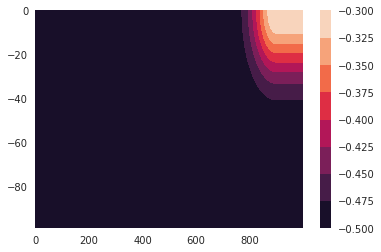

In [30]:
plt.contourf(x,z,u)
plt.colorbar()

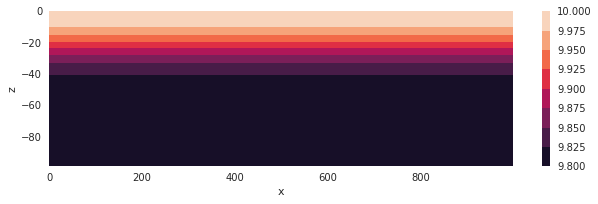

In [37]:
popt = [-0.1,-0.04,15,6.98]
temp = func(x,*popt)
temp = np.hstack([temp[:,:nx//2],temp[:,:nx//2][:,::-1]])

temp = U.copy()
temp[:,:-displace] = temp[:,-displace][:,None]
temp = temp-temp.max() + 10

sns.set()

fig,ax = plt.subplots(figsize=(9,3))

C = ax.contourf(x,z,temp)
_ = ax.set(xlabel='x',ylabel='z')
fig.colorbar(C)
fig.tight_layout()
# fig.savefig('../img/temp.png',bbox='tight',dpi=600)

# Bathymetry

In [41]:
bat = x[0]*0-10
bat[-1] = 0

## Saving binary files

In [43]:
xmitgcm.utils.write_to_binary(temp[:,None,-1].flatten(), os.path.join(indir,'TEMP_E.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(u[:,None,-1].flatten(), os.path.join(indir,'U_E.bin'),dtype='float64')

xmitgcm.utils.write_to_binary(temp[:,None,:].flatten(), os.path.join(indir,'TEMP.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(u[:,None,:].flatten(), os.path.join(indir,'U.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(bat.flatten(), os.path.join('../input/','BAT.bin'),dtype='float64')